In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
%matplotlib inline
pd.set_option('display.max_columns', None)

In [9]:
data_path = '/Users/hrh/Desktop/AI/erdos/SolarFarmPrediction/data/'
threshold2 = 'threshold_95percentile/'

print(data_path+ threshold2+ 'ca_data_version_3.csv')
ca_data = pd.read_csv(data_path+ threshold2+ 'ca_data_version_3.csv')
ca_data

/Users/hrh/Desktop/AI/erdos/SolarFarmPrediction/data/threshold_95percentile/ca_data_version_3.csv


,Unnamed: 0,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
0,0,38.091046,-121.753704,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,6.0,29.0,NaN,5.759949,"[90124.13525513172, 116500.8249419729, 142042....","[109.4070110823117, 145.701977658052, 180.3936...","[3.529258422010054, 5.203642059216143, 5.81914...","[94618.59247819753, 121998.4795294093, 148790....",1.621200e+06,42.0496
1,1,38.384357,-121.322253,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,14.0,NaN,5.847310,"[83435.5657723509, 108614.2904883136, 143017.9...","[102.732582454375, 135.8822980955997, 182.3777...","[3.313954272721776, 4.852939217699989, 5.88315...","[87675.08228642984, 113841.4195850213, 149899....",1.633058e+06,8.4315
2,2,40.222444,-124.061968,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,428.0,NaN,5.228260,"[78206.88536471261, 75419.72299708497, 112392....","[97.75660918743236, 95.07804802691463, 143.615...","[3.153439006046205, 3.395644572389808, 4.63274...","[82215.48988423115, 79375.7469613844, 117960.1...",1.454193e+06,355.8478
3,3,34.766846,-115.907541,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,781.0,NaN,6.651584,"[146493.639149292, 145827.290637644, 171213.88...","[180.0111042703568, 181.4365533782946, 219.059...","[5.806809815172802, 6.479876906367665, 7.06643...","[153438.1522583685, 152769.4129813524, 179492....",1.855833e+06,335.9567
4,4,35.568565,-120.114190,NaN,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,509.0,NaN,6.271572,"[111515.6756357151, 113526.884078058, 158439.8...","[137.3515247050017, 143.1885195790477, 201.692...","[4.430694345322636, 5.113875699251705, 6.50622...","[116878.0538940309, 118948.4203479593, 166052....",1.741572e+06,162.4310
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,11.2750
4996,4996,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,312.0,land_cover,5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,30.3699
4997,4997,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0,land_cover,6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,259.8465
4998,4998,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,760.0,land_cover,5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,47.8689


In [15]:
# Drop rows where Solar_farm_present is Nan
ca_data = ca_data.loc[~np.isnan(ca_data['Solar_farm_present'])]
ca_data

,Unnamed: 0,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
73,73,40.887284,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,338.0,ac_annual,5.349295,"[84661.176987843, 72649.76035786551, 112735.47...","[107.344308825593, 93.30063299561172, 148.4914...","[3.462719639535258, 3.33216546412899, 4.790047...","[88903.35826170366, 76482.4797303436, 118322.3...",1.416788e+06,41.9129
76,76,35.705444,-117.525483,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,732.0,min_distance,6.809539,"[141820.5828811217, 145375.6418209012, 172984....","[175.1671085471568, 180.7160853864701, 222.881...","[5.650551888617961, 6.454145906659646, 7.18971...","[148592.9075467213, 152694.1415854955, 181451....",1.898908e+06,151.3281
429,429,38.345249,-123.048058,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,55.0,ac_annual,5.000902,"[95251.16728585993, 92746.74645238271, 126798....","[117.2199461552818, 115.4155876117971, 159.990...","[3.781288585654251, 4.121985271849898, 5.16096...","[99883.8516620315, 97371.09755991657, 133015.8...",1.424107e+06,39.3432
479,479,40.574418,-124.277694,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,5.0,30.0,ac_annual,4.403701,"[73448.76435798961, 79241.73641970158, 105322....","[88.63520832504797, 96.47753950744588, 129.327...","[2.859200268549935, 3.44562641098021, 4.171856...","[77277.35915734345, 83331.91284774637, 110855....",1.290373e+06,274.4128
685,685,41.943206,-124.191403,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,3.0,9.0,ac_annual,4.529718,"[70634.4571220917, 74999.48557192499, 107318.9...","[86.12007657430543, 92.21117154707214, 134.948...","[2.778066986267917, 3.293256126681148, 4.35319...","[74330.5404116393, 78906.3577613249, 112761.05...",1.300709e+06,369.7502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,36.702703,-121.861567,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.141176,"[103748.5975009087, 109316.9939753222, 135273....","[128.6876727731861, 137.324382721564, 171.4905...","[4.151215250747938, 4.904442240055857, 5.53195...","[108751.6256593098, 114548.3993639391, 141699....",1.464093e+06,11.2750
4996,4996,40.789513,-122.379308,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,312.0,land_cover,5.430239,"[88884.21123100286, 81922.54581368579, 117951....","[112.8995982651848, 105.5940652728885, 157.345...","[3.64192252468338, 3.771216616888874, 5.075661...","[93276.73151684031, 86096.73117936027, 123728....",1.433285e+06,30.3699
4997,4997,34.356210,-114.203309,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,138.0,land_cover,6.219317,"[124837.9431145389, 125771.4037536173, 153395....","[156.1995588353776, 158.5818655818261, 202.295...","[5.038695446302503, 5.663638056493788, 6.52565...","[130777.6008227633, 131671.1873421082, 160546....",1.706553e+06,259.8465
4998,4998,40.613526,-121.904712,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,2.0,760.0,land_cover,5.447233,"[79069.93940232327, 88855.35885862306, 121174....","[97.78370331916676, 112.5304549586541, 155.260...","[3.154313010295702, 4.018944819951931, 5.00839...","[83112.49525166971, 93303.08686350507, 127161....",1.496072e+06,47.8689


In [16]:
ca_data.describe()

,Unnamed: 0,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,2617.000000,2617.000000,2617.000000,2617.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,2617.000000,2617.000000,2617.000000,2617.000000,2.617000e+03,2580.000000
mean,3683.584639,37.226136,-119.755790,0.077570,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.694306,6.654948,776.027130,5.942066,1.668762e+06,156.045791
std,776.112815,2.720731,2.540242,0.267544,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.460789,9.226288,706.281206,0.617852,1.643465e+05,129.604262
min,73.000000,32.557231,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-80.000000,4.206421,1.224815e+06,1.999200
25%,3037.000000,34.981941,-121.796849,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,0.000000,0.000000,31.000000,5.575862,1.569889e+06,48.529100
50%,3691.000000,36.839582,-120.222053,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,2.000000,764.000000,5.910592,1.656403e+06,117.890200
75%,4345.000000,39.714037,-117.633346,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,9.000000,1295.000000,6.536693,1.826539e+06,246.961350
max,4999.000000,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,49.000000,3835.000000,6.994842,1.995563e+06,604.130600


In [17]:
ca_data.isnull().sum()

Unnamed: 0               0
Latitude                 0
Longitude                0
Solar_farm_present       0
State                    0
panel.area            2414
power                 2463
panels                2414
landscape.area        2414
water                 2414
urban                 2414
Address               2414
land_cover               0
slope                    0
elevation                0
feature_violated       203
solrad_annual            0
ac_monthly               0
poa_monthly              0
solrad_monthly           0
dc_monthly               0
ac_annual                0
min_distance            37
dtype: int64

In [18]:
# solar = solar[solar['Solar_farm_present'].notnull()]

In [19]:
# solar.head()

In [44]:
solar.describe()

,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,3414.000000,3414.000000,3414.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,3414.000000,3414.000000,3414.000000,3414.000000,3.414000e+03,3376.000000
mean,36.755764,-118.988392,0.059461,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.765671,3.956063,651.196544,6.072497,1.697296e+06,163.297557
std,2.749319,2.791358,0.236520,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.423641,7.494063,618.082330,0.611535,1.578832e+05,127.153195
min,32.537677,-124.450274,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-84.000000,4.113513,1.194338e+06,0.139700
25%,34.512643,-121.365398,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,78.000000,5.623467,1.587920e+06,56.003950
50%,35.842322,-118.474676,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,541.500000,6.171427,1.717505e+06,131.032450
75%,38.990535,-116.468428,0.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,2.000000,1066.750000,6.619519,1.836583e+06,250.091225
max,41.982314,-114.138592,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,46.000000,3941.000000,6.926908,1.966255e+06,607.302400


In [20]:
solar_existing     = ca_data[ca_data['Solar_farm_present']==1]
solar_non_existing = ca_data[ca_data['Solar_farm_present']==0]

In [22]:
solar_non_existing_sample = solar_non_existing.sample(300, random_state = 42)

In [23]:
solar_non_existing_sample

,Unnamed: 0,Latitude,Longitude,Solar_farm_present,State,panel.area,power,panels,landscape.area,water,urban,Address,land_cover,slope,elevation,feature_violated,solrad_annual,ac_monthly,poa_monthly,solrad_monthly,dc_monthly,ac_annual,min_distance
3148,3148,35.392578,-118.086370,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,4.0,1166.0,elevation,6.887634,"[143447.8797469075, 144880.6996192943, 180606....","[175.937722371986, 179.6242425027209, 230.6819...","[5.675410399096323, 6.415151517954319, 7.44135...","[150554.6758476068, 153324.5819658136, 189907....",1.942882e+06,101.6151
4974,4974,37.699963,-122.228301,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,5.362871,"[87221.00787457965, 114284.9724669592, 135936....","[105.6472213436592, 140.4945488836364, 169.780...","[3.407974882053523, 5.01766246012987, 5.476791...","[91586.97503077543, 119709.9119418782, 142410....",1.539354e+06,14.0331
4749,4749,38.091046,-122.098865,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,1.0,land_cover,5.698749,"[91206.9497728325, 115583.6906262312, 138408.3...","[110.577134325024, 144.1318586195067, 175.0398...","[3.56700433306529, 5.147566379268098, 5.646448...","[95727.45100722666, 121053.8752708981, 145020....",1.614942e+06,14.6973
4267,4267,36.585379,-121.991002,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,4.933850,"[103764.467693299, 106384.9590570148, 132142.5...","[128.7821132870936, 133.9842649432606, 167.911...","[4.154261718938503, 4.785152319402165, 5.41651...","[108789.0546261094, 111519.8949043539, 138523....",1.411299e+06,20.4231
4401,4401,33.417612,-118.388385,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,-1.0,land_cover,5.779479,"[130156.1525987653, 124418.327428604, 143918.4...","[162.9159636576711, 155.7451909754409, 182.129...","[5.255353666376488, 5.562328249122889, 5.87514...","[136208.5204957931, 130292.1173831546, 150744....",1.652451e+06,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4697,4697,40.652635,-124.299266,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,2.0,land_cover,4.555388,"[73810.0996359856, 85640.77351207093, 113730.4...","[89.24751912104593, 103.8820750847468, 140.701...","[2.878952229711159, 3.710074110169528, 4.53876...","[77649.18025133983, 90045.48449062901, 119480....",1.336555e+06,269.3221
2623,2623,42.001868,-121.796849,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,1244.0,elevation,5.562766,"[88114.85512246056, 102075.9215294712, 129563....","[105.9689447098226, 125.4314777846514, 162.018...","[3.418353055155567, 4.479695635166123, 5.22641...","[92530.02132470535, 107042.0409519479, 136022....",1.575409e+06,207.1067
2453,2453,41.434799,-120.998665,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1459.0,elevation,5.612570,"[85278.03755198304, 99799.53442862816, 130538....","[102.3850635086855, 120.5610147457866, 163.103...","[3.302743984151146, 4.305750526635234, 5.26139...","[89557.83065853253, 105288.9578177113, 137352....",1.593467e+06,203.4693
4270,4270,39.107859,-123.759952,0.0,CA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,land_cover,4.856613,"[88150.20259472798, 92398.30707897429, 124077....","[107.0705353142136, 113.4715604420209, 154.876...","[3.453888235942375, 4.052555730072175, 4.99602...","[92525.79383592929, 97019.57711986899, 130166....",1.407474e+06,140.2427


In [25]:
solar = pd.concat([solar_existing, solar_non_existing_sample])

In [26]:
solar.describe()

,Unnamed: 0,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,497.000000
mean,3836.974155,36.651699,-119.367042,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.799205,4.532803,644.475149,6.059013,1.694389e+06,122.824702
std,632.184959,2.664693,2.451945,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.400994,7.539697,617.127182,0.598044,1.577946e+05,125.634957
min,2412.000000,32.576785,-124.342411,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-70.000000,4.245634,1.240365e+06,2.173700
25%,3413.500000,34.708184,-121.408543,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,61.500000,5.673597,1.596671e+06,22.650900
50%,4049.000000,35.685889,-118.755119,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,603.000000,6.071774,1.689321e+06,73.274800
75%,4174.500000,38.521236,-117.514697,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,5.000000,1012.000000,6.603144,1.837977e+06,194.208200
max,4997.000000,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,43.000000,3232.000000,6.920728,1.963519e+06,582.108400


In [50]:
# solar.to_csv('ca_data_version_17.csv', index = False)

In [27]:
solar.columns

Index(['Unnamed: 0', 'Latitude', 'Longitude', 'Solar_farm_present', 'State',
       'panel.area', 'power', 'panels', 'landscape.area', 'water', 'urban',
       'Address', 'land_cover', 'slope', 'elevation', 'feature_violated',
       'solrad_annual', 'ac_monthly', 'poa_monthly', 'solrad_monthly',
       'dc_monthly', 'ac_annual', 'min_distance'],
      dtype='object')

In [28]:
solar.describe()

,Unnamed: 0,Latitude,Longitude,Solar_farm_present,panel.area,power,panels,landscape.area,water,urban,land_cover,slope,elevation,solrad_annual,ac_annual,min_distance
count,503.000000,503.000000,503.000000,503.000000,203.000000,154.000000,203.000000,203.000000,203.0,203.000000,503.000000,503.000000,503.000000,503.000000,5.030000e+02,497.000000
mean,3836.974155,36.651699,-119.367042,0.403579,0.946373,41.421427,140.073892,1.111614,0.0,0.241379,0.799205,4.532803,644.475149,6.059013,1.694389e+06,122.824702
std,632.184959,2.664693,2.451945,0.491103,2.453245,72.677149,699.100164,2.577767,0.0,0.428978,0.400994,7.539697,617.127182,0.598044,1.577946e+05,125.634957
min,2412.000000,32.576785,-124.342411,0.000000,0.010197,0.847425,2.000000,0.010197,0.0,0.000000,0.000000,0.000000,-70.000000,4.245634,1.240365e+06,2.173700
25%,3413.500000,34.708184,-121.408543,0.000000,0.029736,4.098140,4.000000,0.042968,0.0,0.000000,1.000000,0.000000,61.500000,5.673597,1.596671e+06,22.650900
50%,4049.000000,35.685889,-118.755119,0.000000,0.179611,21.818414,6.000000,0.307159,0.0,0.000000,1.000000,1.000000,603.000000,6.071774,1.689321e+06,73.274800
75%,4174.500000,38.521236,-117.514697,1.000000,0.933500,46.167847,15.500000,1.149092,0.0,0.000000,1.000000,5.000000,1012.000000,6.603144,1.837977e+06,194.208200
max,4997.000000,42.001868,-114.203309,1.000000,22.289277,551.823434,6217.000000,22.289277,0.0,1.000000,1.000000,43.000000,3232.000000,6.920728,1.963519e+06,582.108400


In [29]:
columns_ML = ['land_cover','slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X = solar[columns_ML]
y = solar['Solar_farm_present']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [31]:
imputer = SimpleImputer(strategy='mean')
X_train = pd.DataFrame(imputer.fit_transform(X_train), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )
X_test = pd.DataFrame(imputer.fit_transform(X_test), columns = ['slope', 'elevation', 'solrad_annual', 'ac_annual', 'min_distance',
       'land_cover'] )

In [32]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,402.000000,402.000000,402.000000,402.000000,4.020000e+02,402.000000
mean,0.796020,4.699005,617.880597,6.053727,1.692743e+06,121.810721
std,0.403456,7.737363,591.963903,0.599025,1.575689e+05,122.246081
min,0.000000,0.000000,-70.000000,4.291306,1.246514e+06,2.246300
25%,1.000000,0.000000,60.750000,5.693117,1.599703e+06,23.306850
50%,1.000000,1.000000,553.500000,6.062267,1.685026e+06,73.977200
75%,1.000000,6.000000,991.750000,6.595994,1.838067e+06,193.036025
max,1.000000,43.000000,3232.000000,6.920728,1.942882e+06,546.002400


In [33]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,101.000000,101.000000,101.000000,101.000000,1.010000e+02,101.000000
mean,0.811881,3.871287,750.326733,6.080053,1.700944e+06,126.800310
std,0.392756,6.689788,701.781748,0.596630,1.593087e+05,135.438003
min,0.000000,0.000000,-38.000000,4.245634,1.240365e+06,2.173700
25%,1.000000,0.000000,65.000000,5.629968,1.592841e+06,21.994900
50%,1.000000,1.000000,785.000000,6.081308,1.705506e+06,80.355300
75%,1.000000,4.000000,1305.000000,6.607467,1.836875e+06,194.208200
max,1.000000,37.000000,2982.000000,6.847865,1.963519e+06,582.108400


In [34]:
sd = StandardScaler()

In [35]:
columns_ML_excluding_LC = ['slope', 'elevation',  'solrad_annual','ac_annual', 'min_distance']
X_train_excluding_LC = X_train[columns_ML_excluding_LC ]
X_train_excluding_LC = pd.DataFrame(sd.fit_transform(X_train_excluding_LC), columns = columns_ML_excluding_LC)

X_test_excluding_LC = X_test[columns_ML_excluding_LC ]
X_test_excluding_LC = pd.DataFrame(sd.fit_transform(X_test_excluding_LC), columns = columns_ML_excluding_LC)

In [36]:
X_train_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02
mean,-1.104700e-16,-1.767519e-17,5.302558e-17,-1.900083e-16,8.263152e-16
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00
min,-1.975459e+00,-6.080703e-01,-1.163479e+00,-2.945817e+00,-2.835485e+00
25%,5.062114e-01,-6.080703e-01,-9.423291e-01,-6.027458e-01,-5.912063e-01
50%,5.062114e-01,-4.786662e-01,-1.088932e-01,1.427322e-02,-4.903355e-02
75%,5.062114e-01,1.683540e-01,6.323617e-01,9.063775e-01,9.234409e-01
max,5.062114e-01,4.956304e+00,4.421514e+00,1.449156e+00,1.589473e+00


In [37]:
X_test_excluding_LC.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02
mean,-1.439992e-16,3.297692e-18,3.737384e-17,-1.115719e-15,5.924854e-16
std,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00
min,-2.077448e+00,-5.815723e-01,-1.128924e+00,-3.089971e+00,-2.905528e+00
25%,4.813599e-01,-5.815723e-01,-9.814231e-01,-7.581419e-01,-6.819590e-01
50%,4.813599e-01,-4.313452e-01,4.965390e-02,2.114649e-03,2.877934e-02
75%,4.813599e-01,1.933616e-02,7.943207e-01,8.883987e-01,8.575135e-01
max,4.813599e-01,4.976831e+00,3.195871e+00,1.293335e+00,1.656436e+00


In [38]:
X_train = pd.concat([X_train_excluding_LC, X_train['land_cover']], axis=1)
X_test = pd.concat([X_test_excluding_LC, X_test['land_cover']], axis=1)

In [39]:
X_train.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,4.020000e+02,402.000000
mean,-1.104700e-16,-1.767519e-17,5.302558e-17,-1.900083e-16,8.263152e-16,121.810721
std,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,1.001246e+00,122.246081
min,-1.975459e+00,-6.080703e-01,-1.163479e+00,-2.945817e+00,-2.835485e+00,2.246300
25%,5.062114e-01,-6.080703e-01,-9.423291e-01,-6.027458e-01,-5.912063e-01,23.306850
50%,5.062114e-01,-4.786662e-01,-1.088932e-01,1.427322e-02,-4.903355e-02,73.977200
75%,5.062114e-01,1.683540e-01,6.323617e-01,9.063775e-01,9.234409e-01,193.036025
max,5.062114e-01,4.956304e+00,4.421514e+00,1.449156e+00,1.589473e+00,546.002400


In [40]:
X_test.describe()

,slope,elevation,solrad_annual,ac_annual,min_distance,land_cover
count,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,1.010000e+02,101.000000
mean,-1.439992e-16,3.297692e-18,3.737384e-17,-1.115719e-15,5.924854e-16,126.800310
std,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,1.004988e+00,135.438003
min,-2.077448e+00,-5.815723e-01,-1.128924e+00,-3.089971e+00,-2.905528e+00,2.173700
25%,4.813599e-01,-5.815723e-01,-9.814231e-01,-7.581419e-01,-6.819590e-01,21.994900
50%,4.813599e-01,-4.313452e-01,4.965390e-02,2.114649e-03,2.877934e-02,80.355300
75%,4.813599e-01,1.933616e-02,7.943207e-01,8.883987e-01,8.575135e-01,194.208200
max,4.813599e-01,4.976831e+00,3.195871e+00,1.293335e+00,1.656436e+00,582.108400


# Logistic Regression:

In [41]:
params = {"C": np.logspace(-1, 1, 100),
          "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

lr = LogisticRegression(max_iter=3000, random_state=104)   
lr_cv = GridSearchCV(lr, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)
lr_cv.fit(X_train, y_train)

Fitting 5 folds for each of 600 candidates, totalling 3000 fits


/Users/hrh/anaconda3/envs/rapower/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hrh/anaconda3/envs/rapower/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hrh/anaconda3/envs/rapower/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hrh/anaconda3/envs/rapower/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hrh/anaconda3/envs/rapower/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/hrh

GridSearchCV(cv=5,
             estimator=LogisticRegression(max_iter=3000, random_state=104),
             n_jobs=-1,
             param_grid={'C': array([ 0.1       ,  0.10476158,  0.10974988,  0.1149757 ,  0.12045035,
        0.12618569,  0.13219411,  0.13848864,  0.14508288,  0.15199111,
        0.15922828,  0.16681005,  0.17475284,  0.18307383,  0.19179103,
        0.2009233 ,  0.21049041,  0.22051307,  0.23101297,  0.24201283,
        0.25353645,  0.26560878,  0.278...
        3.27454916,  3.43046929,  3.59381366,  3.76493581,  3.94420606,
        4.1320124 ,  4.32876128,  4.53487851,  4.75081016,  4.97702356,
        5.21400829,  5.46227722,  5.72236766,  5.9948425 ,  6.28029144,
        6.57933225,  6.8926121 ,  7.22080902,  7.56463328,  7.92482898,
        8.30217568,  8.69749003,  9.11162756,  9.54548457, 10.        ]),
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']},
             scoring='accuracy', verbose=1)

In [43]:
lr_tuned = LogisticRegression(**lr_cv.best_params_, max_iter=3000, random_state=104)
lr_tuned.fit(X_train, y_train)
y_pred_train_lr = lr_tuned.predict(X_train) 
y_pred_test_lr = lr_tuned.predict(X_test)

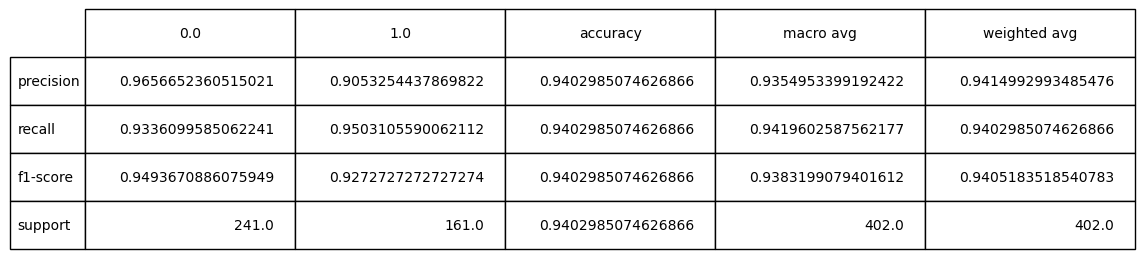

In [44]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

In [53]:
def plot_confusion_matrix(y_true, y_pred):
    
    figsize = (10, 10)
    fig, ax = plt.subplots(figsize=figsize)
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
    cax = ax.matshow(cm, cmap=plt.cm.Blues) # https://matplotlib.org/3.2.0/api/_as_gen/matplotlib.axes.Axes.matshow.html
    fig.colorbar(cax)

    ax.set(title="Confusion Matrix: Threshold =95%, LR",
           xlabel="Predicted label",
           ylabel="True label",
           #xticks=np.arange(n_classes),
           #yticks=np.arange(n_classes),
           #xticklabels=labels,
           #yticklabels=labels
          )

    ax.xaxis.set_label_position("bottom")
    ax.xaxis.tick_bottom()

    ax.xaxis.label.set_size(20)
    ax.yaxis.label.set_size(20)
    ax.title.set_size(20)

    threshold = (cm.max() + cm.min()) / 2.

    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f"{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)",
               horizontalalignment="center",
               color="white" if cm[i, j] > threshold else "black",
               size=15)
        

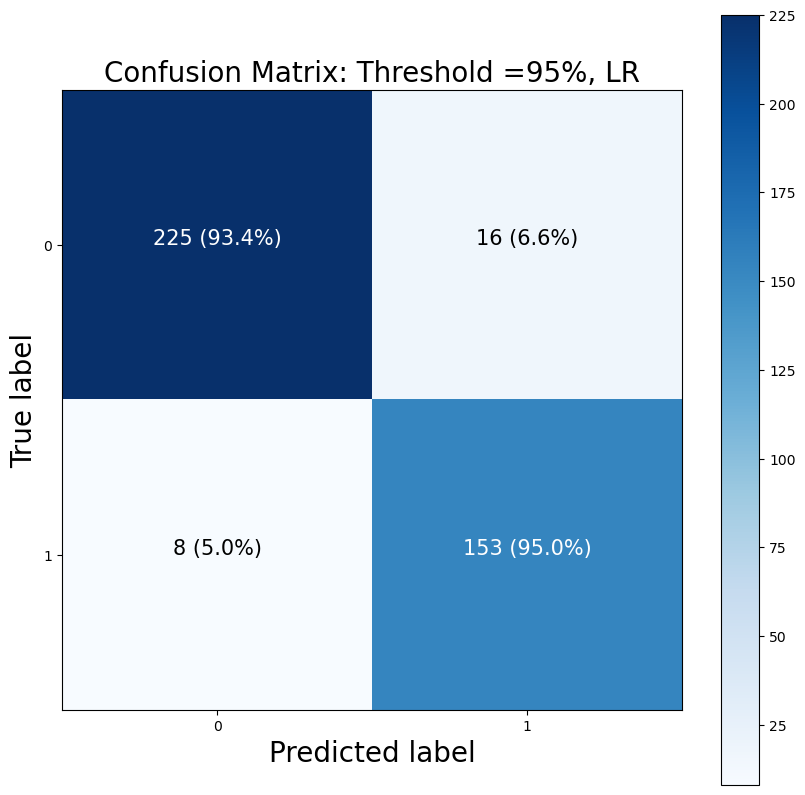

In [54]:
plot_confusion_matrix(y_train, y_pred_train_lr)

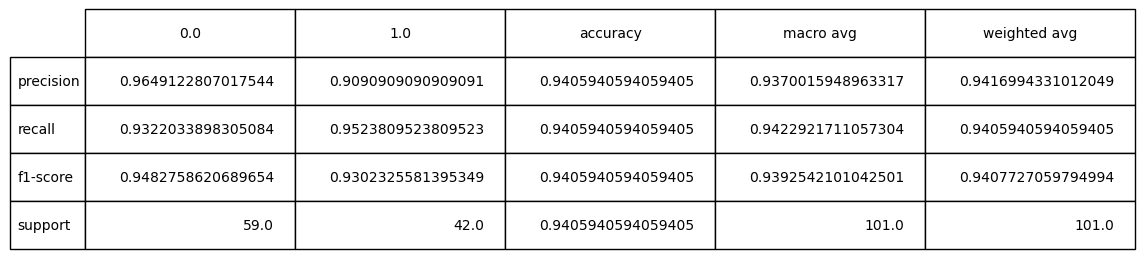

In [55]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_lr, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

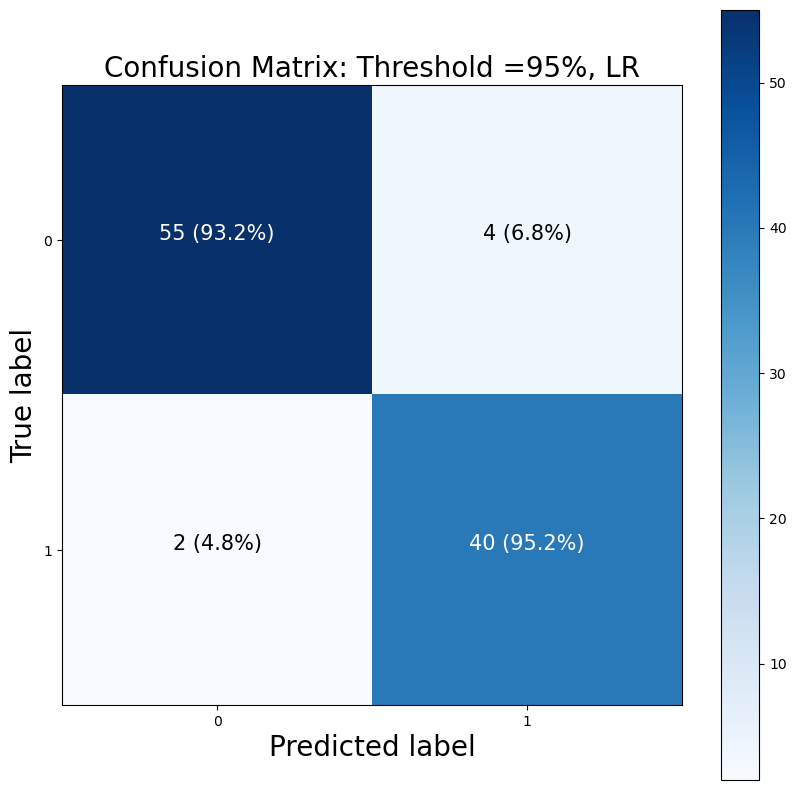

In [56]:
plot_confusion_matrix(y_test, y_pred_test_lr)

# Decision Tree Classifier:

In [57]:
params = {"criterion":("gini", "entropy"), 
          "splitter":("best", "random"), 
          "max_depth":(list(range(1, 20))), 
          "min_samples_split":[2, 3, 4], 
          "min_samples_leaf":list(range(1, 20))
          }

tree = DecisionTreeClassifier(random_state=406)

tree_cv = GridSearchCV(tree, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=5)

tree_cv.fit(X_train, y_train)


Fitting 5 folds for each of 4332 candidates, totalling 21660 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=406),
             n_jobs=-1,
             param_grid={'criterion': ('gini', 'entropy'),
                         'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                              12, 13, 14, 15, 16, 17, 18, 19],
                         'min_samples_split': [2, 3, 4],
                         'splitter': ('best', 'random')},
             scoring='accuracy', verbose=1)

In [58]:
tree_tuned = DecisionTreeClassifier(**tree_cv.best_params_, random_state = 406)
tree_tuned.fit(X_train, y_train)
y_pred_train_tree = tree_tuned.predict(X_train) 
y_pred_test_tree = tree_tuned.predict(X_test)

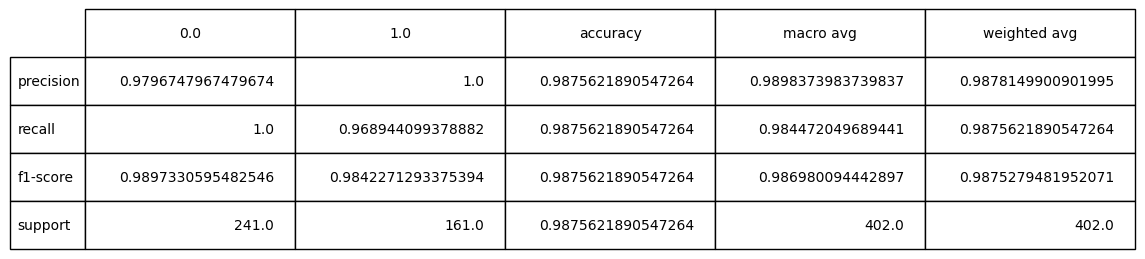

In [59]:
df = pd.DataFrame(classification_report(y_train, y_pred_train_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

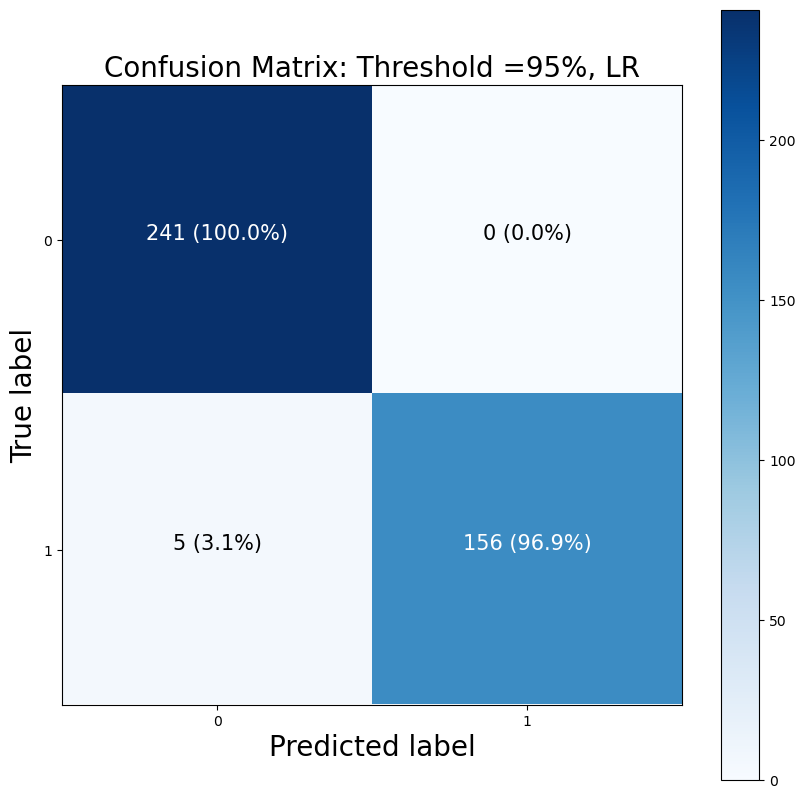

In [60]:
plot_confusion_matrix(y_train, y_pred_train_tree)

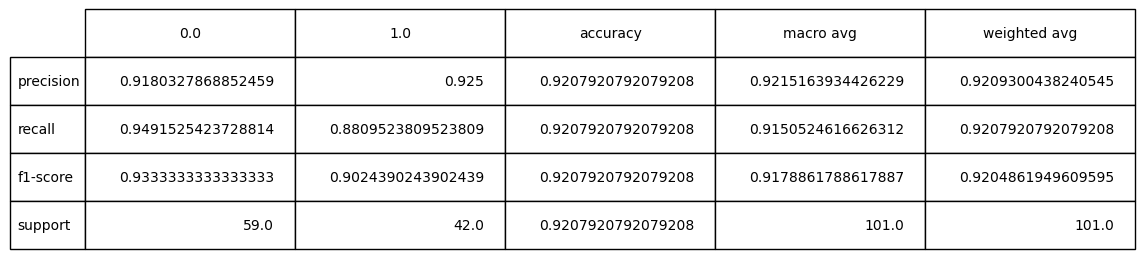

In [61]:
df = pd.DataFrame(classification_report(y_test, y_pred_test_tree, output_dict=True))
fig, ax = plt.subplots(figsize=(15, 8))
ax.axis('off')
table = ax.table(cellText=df.values, colLabels=df.columns, rowLabels=df.index, loc='center', bbox=[0, 0, 1, 1], fontsize=14)
plt.subplots_adjust(left=0.1, right=0.8, top=0.9, bottom=0.6)

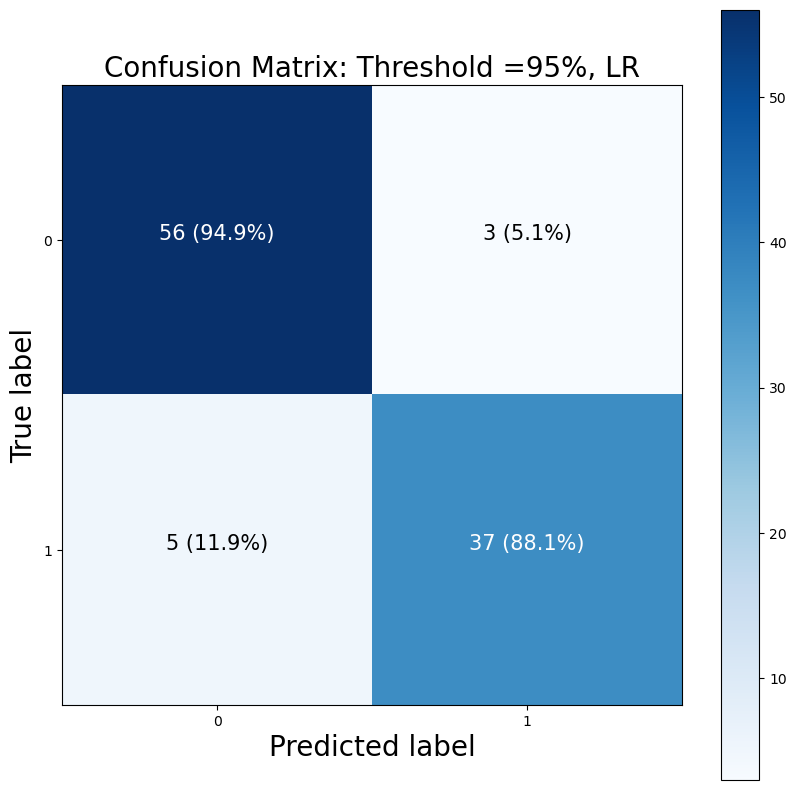

In [62]:
plot_confusion_matrix(y_test, y_pred_test_tree)